<a target="_blank" href="https://colab.research.google.com/github/sonder-art/neuroscience/blob/main/10_features.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [3]:
# !pip install -U scikit-learn
# !pip install seaborn
# !pip install scipy


In [4]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [5]:
# Local path
demo_path = 'data/input/subject_demographics/demographics.csv'
# Web Path
demo_path = 'https://raw.githubusercontent.com/sonder-art/neuroscience/main/data/input/subject_demographics/demographics.csv'

In [6]:
demo_raw = pd.read_csv(demo_path)
print(demo_raw.shape)
demo = demo_raw.copy()
demo.head(3)

(50, 20)


,subject_id,sex,age,education,fhd,fhd_status,aud_1,aud_2,aud,neg_ur,pos_ur,alcohol_1,alcohol_2,alcohol_3,alcohol_4,alcohol_5,behavior_1a,behavior_1b,behavior_2a,behavior_2b
0,n001,M,23,18,0.295786,FHP,9,8,17,4,10,1.20799,0.0,16.800000,10,137.656,418,40,298,148
1,n002,F,29,17,0.085972,FHN,4,0,8,7,7,4.68000,4.0,11.200000,7,40.192,706,1,695,0
2,n003,M,29,17,0.443509,FHP,2,3,8,12,1,0.00000,3.2,0.102672,6,35.940,407,168,27,538


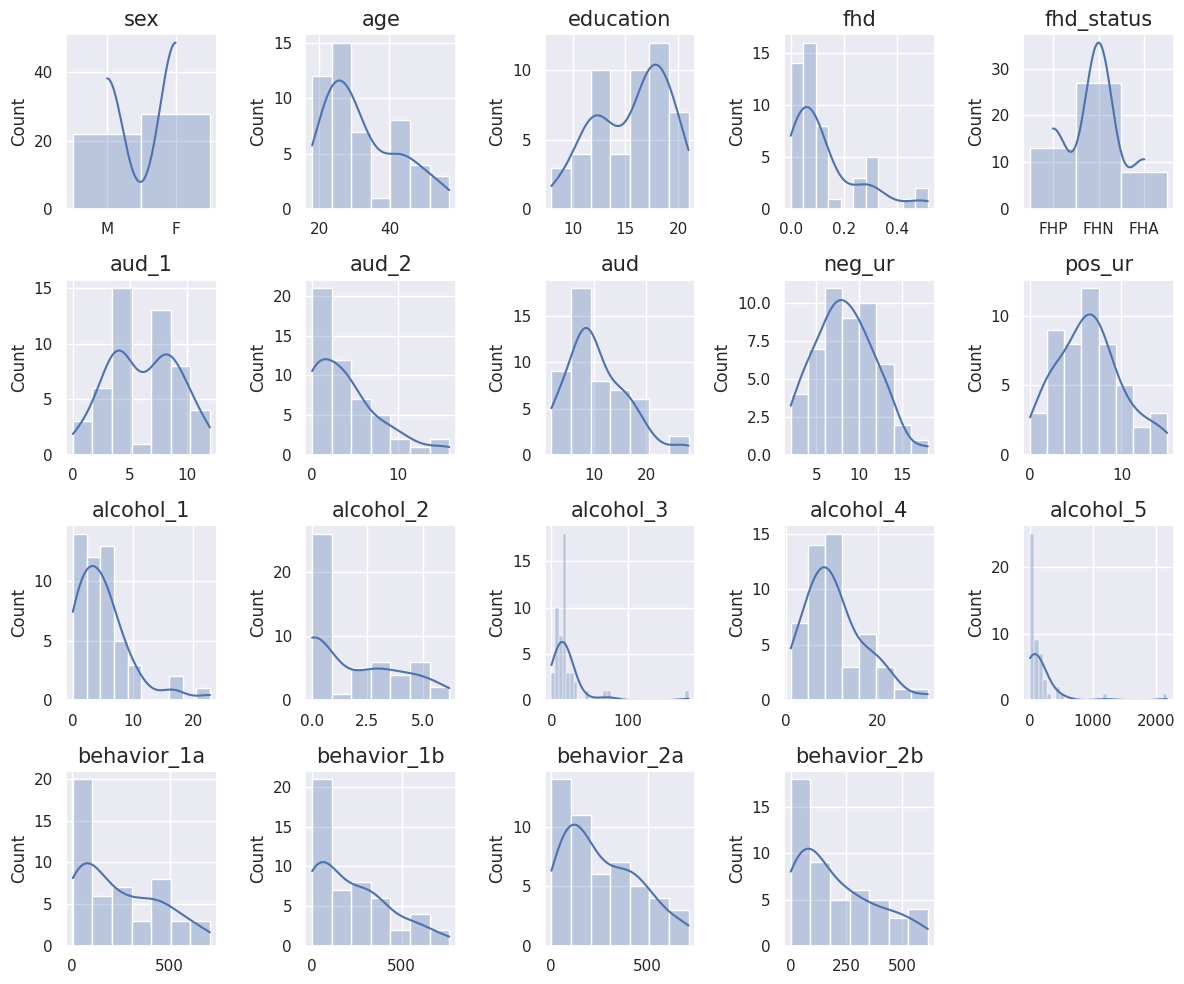

In [7]:
fig = plt.figure(figsize=(12,10))
selected = ['education', 'fha_status','fhd','sex','age']

for i , var in enumerate(demo.columns[1:]):
    #print(i)
    axes = fig.add_subplot(4, 5, i+1)
    axes.set_title(f'{var}', fontsize=15)
    sns.histplot(data=demo, x=var, kde=True, alpha=0.3)
    axes.set_xlabel('')

plt.tight_layout()
plt.show()


# Feature engineering

In [8]:
demo['sex'] = demo['sex'].apply(lambda x: 1 if x=='M' else 0)

In [9]:
demo['behavior_1'] = demo['behavior_1a'] - demo['behavior_1b'] 
demo['behavior_2'] = demo['behavior_2a'] - demo['behavior_2b'] 

In [10]:
demo['alcohol_1_ln'] = np.log10(demo['alcohol_1'] + 1)
demo['alcohol_2_ln'] = np.log10(demo['alcohol_2'] + 1)
demo['alcohol_3_ln'] = np.log10(demo['alcohol_3'] + 1)
demo['alcohol_4_ln'] = np.log10(demo['alcohol_4'] + 1)
demo['alcohol_5_ln'] = np.log10(demo['alcohol_5'] + 1)

In [11]:
demo_std = scipy.stats.zscore(demo.drop(['subject_id', 'fhd_status'], axis=1))
print(demo_std.shape)
demo_std.head()

(50, 25)


,sex,age,education,fhd,aud_1,aud_2,aud,neg_ur,pos_ur,alcohol_1,...,behavior_1b,behavior_2a,behavior_2b,behavior_1,behavior_2,alcohol_1_ln,alcohol_2_ln,alcohol_3_ln,alcohol_4_ln,alcohol_5_ln
0,1.128152,-0.888367,0.699854,1.333922,0.952270,1.019598,1.099257,-1.228099,0.971343,-0.824945,...,-0.871113,0.173714,-0.323115,0.952032,0.264649,-0.911515,-0.978913,0.170985,0.185772,0.459325
1,-0.886405,-0.313992,0.408248,-0.302037,-0.724262,-0.969861,-0.461203,-0.363241,0.129138,-0.066534,...,-1.056861,2.209263,-1.155074,1.821285,1.843393,0.291558,1.116839,-0.321148,-0.319710,-0.596227
2,1.128152,-0.313992,0.408248,2.485751,-1.394874,-0.223814,-0.461203,1.078190,-1.555272,-1.088813,...,-0.261477,-1.215792,1.869210,0.582533,-1.650120,-1.920049,0.889803,-3.452589,-0.531665,-0.690976
3,-0.886405,0.834759,1.283066,-0.032745,-0.388955,0.024868,-0.461203,0.213332,-0.993802,0.160639,...,2.591429,-0.903025,1.582521,-2.081051,-1.325681,0.505642,-0.978913,0.058182,0.034486,0.616378
4,1.128152,-0.888367,-1.924599,-0.580235,-1.394874,0.273551,-1.501509,-1.228099,-0.151597,0.112583,...,-0.590109,0.389062,-0.789687,0.704813,0.626746,0.463260,-0.978913,-0.167608,-0.776348,-1.249662


## PCA

In [12]:
pca = PCA(n_components=1)
pca
urgency = pca.fit_transform(demo_std[['neg_ur','pos_ur']])
print(f'Explained Variance: {pca.explained_variance_ratio_} Cumulative: {np.sum(pca.explained_variance_ratio_):.3f}')
print(f'\nEigenvalues:        {pca.explained_variance_}')
print(f'\nEigenvectors:\n{pca.components_}')
loadings = pd.DataFrame(pca.components_.T, columns=['PC1'], index=['neg_ur','pos_ur'])
print('\nLoadings:')
loadings

Explained Variance: [0.66751312] Cumulative: 0.668

Eigenvalues:        [1.36227167]

Eigenvectors:
[[0.70710678 0.70710678]]

Loadings:


,PC1
neg_ur,0.707107
pos_ur,0.707107


In [13]:
pca = PCA(n_components=2)
pca
ap = pca.fit_transform(demo_std[['behavior_1','behavior_2']])
print(f'Explained Variance: {pca.explained_variance_ratio_} Cumulative: {np.sum(pca.explained_variance_ratio_):.3f}')
print(f'\nEigenvalues:        {pca.explained_variance_}')
print(f'\nEigenvectors:\n{pca.components_}')
loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2'], index=['behavior_1','behavior_2'])
print('\nLoadings:')
loadings

Explained Variance: [0.74777722 0.25222278] Cumulative: 1.000

Eigenvalues:        [1.52607595 0.51474037]

Eigenvectors:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Loadings:


,PC1,PC2
behavior_1,0.707107,-0.707107
behavior_2,0.707107,0.707107


In [14]:
pca = PCA(n_components=2)
pca
alcohol = pca.fit_transform(demo_std[['alcohol_1_ln', 'alcohol_2_ln','alcohol_3_ln','alcohol_4_ln','alcohol_5_ln']])
print(f'Explained Variance: {pca.explained_variance_ratio_} Cumulative: {np.sum(pca.explained_variance_ratio_):.3f}')
print(f'\nEigenvalues:        {pca.explained_variance_}')
print(f'\nEigenvectors:\n{pca.components_}')
loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2'], index=['alcohol_1_ln', 'alcoho_2_ln','alcohol_3_ln','alcohol_4_ln','alcohol_5_ln'])
print('\nLoadings:')
loadings

Explained Variance: [0.47171074 0.20463613] Cumulative: 0.676

Eigenvalues:        [2.40668745 1.04406187]

Eigenvectors:
[[ 0.51333127  0.03349819  0.58545577  0.37728936  0.50026308]
 [ 0.00277487  0.97135329  0.10536649 -0.21050019 -0.03244481]]

Loadings:


,PC1,PC2
alcohol_1_ln,0.513331,0.002775
alcoho_2_ln,0.033498,0.971353
alcohol_3_ln,0.585456,0.105366
alcohol_4_ln,0.377289,-0.210500
alcohol_5_ln,0.500263,-0.032445


In [15]:
demo_std['subject_id'] = demo['subject_id']

demo_std['pca_urgency'] = urgency

demo_std['pca_behavior_1'] = ap[:,0]
demo_std['pca_behavior_2'] = ap[:,1]

demo_std['pca_alcohol_1'] = alcohol[:,0]
demo_std['pca_alcohol_2'] = alcohol[:,1]

demo_std = demo_std[['subject_id','sex','age','education','fhd','aud_1','pca_alcohol_1','pca_alcohol_2','pca_urgency','pca_behavior_1','pca_behavior_2']]
demo_std.head()

,subject_id,sex,age,education,fhd,aud_1,pca_alcohol_1,pca_alcohol_2,pca_urgency,pca_behavior_1,pca_behavior_2
0,n001,1.128152,-0.888367,0.699854,1.333922,0.952270,-0.100724,-0.989391,-0.181554,0.860323,-0.486053
1,n002,-0.886405,-0.313992,0.408248,-0.302037,-0.724262,-0.419833,1.138460,-0.165535,2.591318,0.015633
2,n003,1.128152,-0.313992,0.408248,2.485751,-1.394874,-3.523414,0.629532,-0.337348,-0.754898,-1.578723
3,n004,-0.886405,0.834759,1.283066,-0.032745,-0.388955,0.582196,-0.970594,-0.551876,-2.408923,0.534127
4,n005,1.128152,-0.888367,-1.924599,-0.580235,-1.394874,-0.811180,-0.763278,-0.975593,0.941555,-0.055201


In [16]:
import os
os.makedirs('data/output/', exist_ok=True)
demo_std.to_csv('data/output/processed_demographics.csv', index=False)